[(0, 1), (1, 2)]
{'Graph': <networkx.classes.digraph.DiGraph object at 0x00000243B66EFA10>, 'genesNb': 3, 'autoRG': 0.0, 'duoRG': 0.0, 'AdjMatrice': array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]]), 'meanClustering': 0.0, 'subGraph': {'0-1-2': 'Cascade'}}


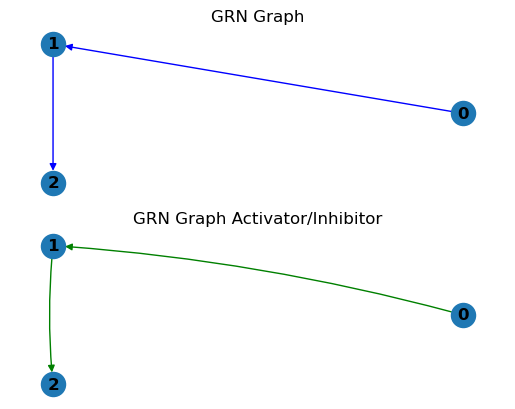

In [1]:
import ochunGRN as oGRN
import numpy as np
AdjMatrice = np.array([[0, 1, 0],
                       [0, 0, 1],
                       [0, 0, 0]])
test = oGRN.GrnFromAdj(AdjMatrice)
print(test)
oGRN.plotGraph(test)

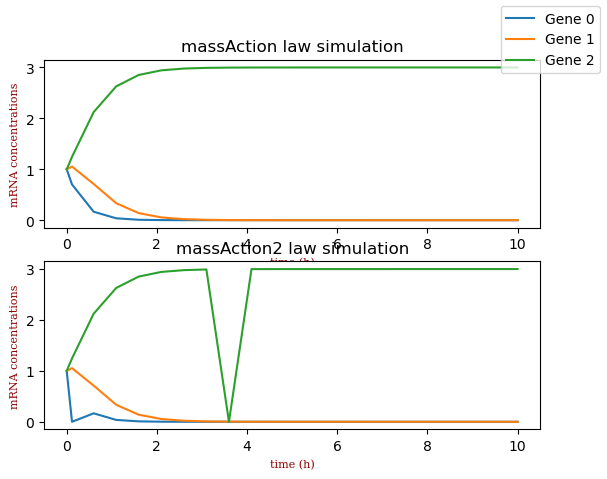

In [2]:
Coeff = {"G0":[100,0,0],"TranscriptionsRate":[3,2,1],"mRNAAvg":[1,1,1]}
oGRN.simulationODEs(test, ["massAction"], (0,10), Coeff)
oGRN.plotSim(test)